**Filtering Datasets and Creating Layouts**<br>

Dataset: us_state_vaccinations.csv<br>

In this exercise, we aim to compare the RATE of fully vaccinated people in the state of Texas and
another state from the 48 continental US states. Draw two “step plots” that compares the two states based on their success in making their people fully vaccinated. Remember, we are trying to compare this number for Texas with any other 48 continental states. <br>

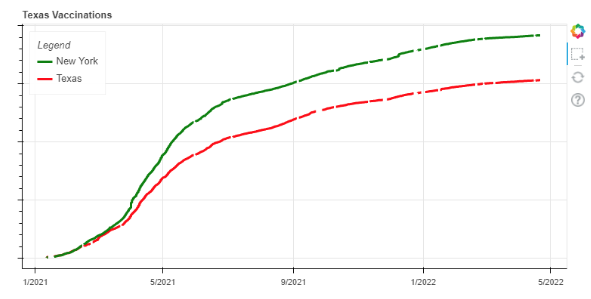<br>

Use bokeh layouts to put together at least three charts (either in two or three rows or
columns). You can choose to compare three different metrics (columns) for Texas and
another state, or you can compare Texas with three different states (one at a time) to create
the layout (grid) of your visualizations. 

In [2]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row,column

# load the dataset
vacc = pd.read_csv('us_state_vaccinations.csv', parse_dates=['date'])

# filter data for Texas, New York, California, Florida
states = (vacc[(vacc['location'] == 'New York State') | (vacc['location'] == 'Texas') |
          (vacc['location'] == 'California') | (vacc['location'] == 'Florida')]
          .loc[:, ['date', 'location', 'people_fully_vaccinated']]
          .sort_values(['location','date']))

# filter data up to 4/29/2022
states = states[states['date'] <= '2022-04-29']

# separate data for each state
new_york_data = states[states['location'] == 'New York State']
cali_data = states[states['location'] == 'California']
florida_data = states[states['location'] == 'Florida']
texas_data = states[states['location'] == 'Texas']

# create ColumnDataSources
new_york_cds = ColumnDataSource(new_york_data)
texas_cds = ColumnDataSource(texas_data)
cali_cds = ColumnDataSource(cali_data)
florida_cds = ColumnDataSource(florida_data)

# create the figures
fig = figure(x_axis_type='datetime',
             height=300, width=600,
             title='Texas vs. New York Vaccinations')

fig.step('date', 'people_fully_vaccinated', line_width=2, color='green', 
         legend_label='New York', source=new_york_cds)
fig.step('date', 'people_fully_vaccinated', line_width=2, color='red', 
         legend_label='Texas', source=texas_cds)
fig.legend.location = 'top_left'

fig1 = figure(x_axis_type='datetime',
             height=300, width=600,
             title='Texas vs. California Vaccinations ')

fig1.step('date', 'people_fully_vaccinated', line_width=2, color='orange', 
         legend_label='California', source=cali_cds)
fig1.step('date', 'people_fully_vaccinated', line_width=2, color='red', 
         legend_label='Texas', source=texas_cds)
fig1.legend.location = 'top_left'

fig2 = figure(x_axis_type='datetime',
             height=300, width=600,
            title='Texas vs. Florida Vaccinations')

fig2.step('date', 'people_fully_vaccinated', line_width=2, color='blue', 
         legend_label='Florida', source=florida_cds)
fig2.step('date', 'people_fully_vaccinated', line_width=2, color='red', 
        legend_label='Texas', source=texas_cds)
fig2.legend.location = 'top_left'

show(column(fig, fig1, fig2))

Use the people_fully_vaccinated column for your comparison once, and then use the
people_fully_vaccinated_per_hundred column for the same comparison. **What can you conclude?**<br>

Based on the 'Texas vs. New York Vaccinations' we can conclude that the overall vaccination rate was higher in Texas but had a lower proportion of the people fully vaccinated compared to New York. In general, if we see that if a state has higher overall vaccinations but appears lower in the category of 'fully vaccinated per x number of people' compared to another state, it means that despite having a higher overall population vaccinated, the ***proportion*** of the population vaccinated is greater.